# Music Recommendation System 
With the growth of music streaming platforms such as Spotify, and Apple music, never before has music has been so accessible. However, the plethora of songs and artists makes it difficult for user's to discover music that relates to their own taste. 
Recommendation systems seek to providers user's with personalized recommendations in an effort to enhance the user's experience of the platform. As most streaming services generate most of their money through subscription plans, the adoption of such models can increase revenue by increased customer retention.  Although the research literature is primarily concerned in increasing performance i.e. low error (e.g. RMSE) and high precision, recall etc, there are number of other variables that are important when deploying these models in production.
- *Diversity*: There is often a diversity–accuracy dilemma in recommender systems. The tuning of parameters to reach the highest accuracy possible, often leads to recommendations that are highly similar
to each other and lack diversity.  ([Hurley et al., 2011](https://dl.acm.org/doi/pdf/10.1145/1944339.1944341?casa_token=JilXozFC5mEAAAAA:H9yYIj40fQJ6pl5aXrIdhymhXwUJA931hUhXoyMdYYt6owXf7t2ESDct37VbIAXFXJ2ATBKpEFIX)). However, users value recommendations from a diverse range of sources e.g. artists of different genres. Diversity in recommendation systems is used to avoid the overfitting problem as well as increasing the quality of user experiences.  For instance, the recent success of TikTok is driven by it's ForYou page. In a recent press conference, Tiktok confirmed avoiding  homogenous video streams was one of the KPI's when developing its algorithm ([Perez, 2021](https://techcrunch.com/2020/06/18/tiktok-explains-how-the-recommendation-system-behind-its-for-you-feed-works/)) . 
- *Labelling*: The way in which recommendations are presented also affects user's likeness to utilise them. [Beel et al. (2013)](https://docear.org/papers/sponsored_vs._organic_(research_paper)_recommendations_and_the_impact_of_labeling.pdf) conducted a human behavioral study in which recommendations were labelled as either "Sponsored" or "Organic". Recommendation with the former had a lower click-through rate ((5.93%) when compared to the latter (8.86%). They were also recommendations  with no label at all. Surprisingly, these performed the best in the study (9.87%).
- *Serendipity*: Serendipity refers to the noveleness or uncertainty of the recommendations and is  related to diversity. Again, there is often a trade-off between model performance and serendipity. The purpose of serendipity is two-fold; mitgates against lost interest due to uniform reccomendation sets and improves the underlying algorithm.
- *Bias*: The  biases  in  NLP  ([Blodgett et  al.,  2020](https://arxiv.org/pdf/2005.14050),  [Garrido-Muñoz  et  al.,  2021](https://www.mdpi.com/2076-3417/11/7/3184/pdf))  and  computer  vision   ([Buo-lamwini & Gebru, 2018](http://proceedings.mlr.press/v81/buolamwini18a/buolamwini18a.pdf)) models are well documented. Likewise, recommender systems can suffer from these same harms as their success often relies on their ability to exploit the collective behavior of users in order to deliver  recommendations. Therefore, there is a risk of enforcing hegemonic viewpoints which may marginalize certain groups. However, some bias is desired such as gender bias when recommending textiles ([Tsintzou et al, 2018](https://arxiv.org/pdf/1811.01461.pdf)). 
- *Robustness against Fraud*: Recommendation systems should be robust against fraud. An example of fraud could be bots designed to increase the perceived popularity of an item, which may cause an algorithm to recommend it more often. 
- *cold-start*: The cold start problem occurs when new items are added that have either none or very little interactions. This is a major problem of collaborative filtering based methods as these algorithms rely on user interactions to make recommendations.
 
The type of algorithms that seek to solve to solve this use case are extremely diverse. Probabilistic models such as latent sematic model ([Hofmann et al., 2004](https://dl.acm.org/doi/pdf/10.1145/963770.963774?casa_token=9ITysHAlZSIAAAAA:9vBR4JmoDX4eFAS0Ce9-oR0YksyU74wYwJjCPoe0M12aYwSwvd2FocX-dD-SVjR4ZOmTJcuDU4TQ)), Bayesian models ([Sembium et al., 2018](https://dl.acm.org/doi/pdf/10.1145/3178876.3186149)), Markov chain models ([Rendle et al., 2010](https://dl.acm.org/doi/pdf/10.1145/1772690.1772773?casa_token=Iz8BdP3EaJwAAAAA:LokNPKaTGOZNTbQVVcBcEVfXCNaSQlGnUvwhdHUReiD003VaqTTtN-t0JCJHFUgBtG7lv_gg-zEE)) and Spectral analysis techniques ([Marple et al., 1989](https://asa.scitation.org/doi/pdf/10.1121/1.398548)) all feature predominantly within the scientific work on recommendation systems. In this investigation, we propose a number of approaches  for artist recommendation, namely weighted matrix factorization (SGD) and a softmax model. Precision, and recall, viewed in different contexts, will be the metrics used to evaluate the robustness of our approaches. Our recommendation systems attempts to give N number of recommendations to the users where N=15.  We also utilise three novel graphs in an attempt to better understand the listening habits of the Last.FM userbase.  Note, we provide a "quick links" section at the start of each notebook, to enable fast browsing when running the code. It also describes the general outline of the proceeding notebook.



In this notebook, we perform an initial data exploration to perform transformations & data sanitization checks; acquire rudimentary statistics of the datasets;  create exploratory visualizations. 


## Quick links
- [Download Last.fm Dataset](#download-data)
- [Dataset description](#dataset)
- [Exploratory data analysis](#exploratory-data-analysis)
    - [Data validation checks](#data-validation)
    - [Exploratory visualisations](#exploratory-visualisation)
- [Data Cleaning](#data-cleaning)
- [Save cleaned dataframes](#save-dataframes)



## Download data
**DO NOT RUN THE NEXT CELL AS THE DATA HAS ALREADY BEEN DOWNLOADED**

Download the Last.FM dataset from the grouplens website into a *data* folder. This cell does not need to executed again, since the files are already there.




In [35]:
#!mkdir data && wget https://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-2k.zip && unzip hetrec2011-lastfm-2k.zip -d data/.

--2021-11-10 19:32:33--  https://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-2k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2589075 (2.5M) [application/zip]
Saving to: ‘hetrec2011-lastfm-2k.zip’

hetrec2011-lastfm-2 100%[===================>]   2.47M  11.9MB/s    in 0.2s    

2021-11-10 19:32:33 (11.9 MB/s) - ‘hetrec2011-lastfm-2k.zip’ saved [2589075/2589075]

Archive:  hetrec2011-lastfm-2k.zip
  inflating: data/./user_friends.dat  
  inflating: data/./user_taggedartists.dat  
  inflating: data/./user_taggedartists-timestamps.dat  
  inflating: data/./artists.dat      
  inflating: data/./readme.txt       
  inflating: data/./tags.dat         
  inflating: data/./user_artists.dat  


## Dataset
**Figure 1:** ER diagram of the Last.fm dataset
![erd](images/erd_orginal_data.png)
In this investigation, we utilise the last.fm dataset. This dataset, introduced at the [5th ACM Conference on Recommender Systems](http://recsys.acm.org/2011) workshop, details music artist listenings, users specified semantic categories(tags) associated with artists, and social networking information (user -> user friendship relationships). Over 1800 users from the last.fm website were included with   17632 artists also being contained. Please refer to the above ER diagram for more context. The entities in the diagram represent .dat files. Unfortunately user's demographic data  are not provided in the dataset. This dataset was curated in 2011.

## Exploratory data analysis
### Data Validation
Import relevant libaries and read in the files as pandas dataframes with the same table names specified in the ER. Minimal transformations are performed at this stage.

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm


In [ ]:
#from google.colab import drive
#import os
#drive.mount('/content/drive/')
#os.chdir("/content/drive/My Drive/DCU/fouth_year/advanced_machine_learning/music-recommodation-system")

In [38]:
artist = pd.read_csv('data/artists.dat', sep='\t')
tags = pd.read_csv('data/tags.dat',encoding = 'unicode_escape', sep='\t')
user_friends = pd.read_csv('data/user_friends.dat', sep='\t')
user_artists = pd.read_csv('data/user_artists.dat', sep='\t')
user_taggedartists_timestamps = pd.read_csv('data/user_taggedartists-timestamps.dat', sep='\t')
user_taggedartists = pd.read_csv('data/user_taggedartists.dat', sep='\t')

check for null_values and ensure expected schema contraints (e.g. that tagID is unique).

In [39]:
print(f'Does artist contain any null values? {artist.isnull().any().any()}')
print(f'Does tags contain any null values? {tags.isnull().any().any()}')
print(f'Does user_friends contain any null values? {user_friends.isnull().any().any()}')
print(f'Does user_artists contain any null values? {user_artists.isnull().any().any()}')
print(f'Does user_taggedartists_timestamps contain any null values? {user_taggedartists_timestamps.isnull().any().any()}')
print(f'Does user_taggedartists contain any null values? {user_taggedartists.isnull().any().any()}')

Does artist contain any null values? True
Does tags contain any null values? False
Does user_friends contain any null values? False
Does user_artists contain any null values? False
Does user_taggedartists_timestamps contain any null values? False
Does user_taggedartists contain any null values? False


In [40]:
print(artist.info())
#Rename id to artistID
artist.rename({'id':'artistID'}, axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          17632 non-null  int64 
 1   name        17632 non-null  object
 2   url         17632 non-null  object
 3   pictureURL  17188 non-null  object
dtypes: int64(1), object(3)
memory usage: 551.1+ KB
None


Not every artist has a pictureUrl attached.
Combine the two user_taggedartist* dfs

In [41]:
user_taggedartists_merged = pd.merge(user_taggedartists_timestamps,user_taggedartists, on=['userID','artistID','tagID'], how='inner')
print(user_taggedartists_merged['artistID'].nunique())

12523


Validate the uniqueness of IDs and surrogate keys.

In [42]:
print(f'Is tagID unique?: {tags["tagID"].is_unique}')
print(f'Is artistID unique?: {artist["artistID"].is_unique}')
user_friends_ids  = [f'{a}_{b}' for a,b in user_friends[['userID', 'friendID']].values.tolist()]
print(f'Is the combination of user and friend IDs unique in user_friends?: {len(set(user_friends_ids)) == len(user_friends_ids)}')
user_artist_tags_ids  = [f'{a}_{b}_{c}' for a,b,c in user_taggedartists_merged[['userID', 'artistID', 'tagID']].values.tolist()]
print(f'is the combination of user artist and tag IDs unique in user_taggedartists_merged?: {len(set(user_artist_tags_ids)) == len(user_artist_tags_ids)}')

Is tagID unique?: True
Is artistID unique?: True
Is the combination of user and friend IDs unique in user_friends?: True
is the combination of user artist and tag IDs unique in user_taggedartists_merged?: True


### Exploratory visualisation
First, we are interested in how the trends in the top 4 most 'mainstream' genres. (Tags and genres are used interchangeably in this investigation). We define mainstream in terms of the most number of users rather than the listening count. First, we flatten the present relational model into a flat dataframe for ease of use. 

In [43]:
flatten_df = pd.merge(user_artists, user_taggedartists_merged, on=['userID', 'artistID'], how='outer')
flatten_df = pd.merge(flatten_df, tags, on=['tagID'], how='inner')
flatten_df = pd.merge(flatten_df, artist, on=['artistID'], how='inner')
flatten_df.head(5)


,userID,artistID,weight,tagID,timestamp,day,month,year,tagValue,name,url,pictureURL
0,2,52,11690.0,13.0,1.238537e+12,1.0,4.0,2009.0,chillout,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...
1,283,52,68.0,13.0,1.222812e+12,1.0,10.0,2008.0,chillout,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...
2,541,52,894.0,13.0,1.193872e+12,1.0,11.0,2007.0,chillout,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...
3,697,52,443.0,13.0,1.170284e+12,1.0,2.0,2007.0,chillout,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...
4,43,52,NaN,13.0,1.272665e+12,1.0,5.0,2010.0,chillout,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...


In [44]:
bubble_chart_df = flatten_df[flatten_df.year>= 2000]
top_ten_tags = bubble_chart_df['tagValue'].value_counts().head(4).index.tolist()
bubble_chart_df = bubble_chart_df.groupby(['year','tagValue']).agg({
    'tagValue':'count',
    'weight':'mean'
    }).rename({
        'tagValue':'number of users',
        'weight':'avg listening count'}, axis=1).reset_index()
bubble_chart_df = bubble_chart_df[bubble_chart_df['tagValue'].isin(top_ten_tags)]

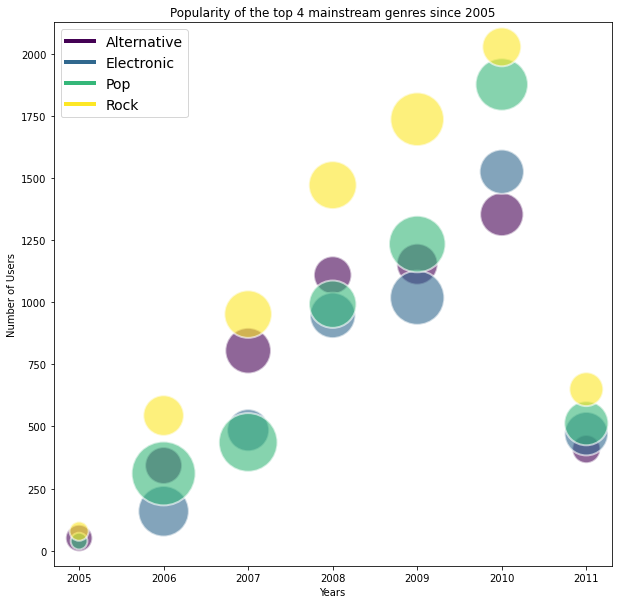

In [45]:
def create_bubble_chart(flattend_df):
    """
    Arguments:
        flattend_df: a df containing the number of users and average 
            listing count grouped by year and tag value.
    Returns:
        A bubble chart show casing  popularity trends of genres since 2005
    """

    # Conert the categorical variable to numeric
    flattend_df['tagValue_cat']=pd.Categorical(flattend_df['tagValue'])
    tag_dict = dict(zip(flattend_df['tagValue'], flattend_df['tagValue']))

    # Set the figure size
    plt.figure(figsize=(10, 10))
    
    # bars for legend
    custom_lines = [Line2D([0], [0], color=(0.267004, 0.004874, 0.329415, 1), lw=4),
                Line2D([0], [0], color=(0.190631, 0.407061, 0.556089, 1), lw=4),
                Line2D([0], [0], color=(0.20803 , 0.718701, 0.472873, 1     ), lw=4),
                Line2D([0], [0], color= (0.993248, 0.906157, 0.143936, 1), lw=4)]

    # Bubblechart
    plt.scatter(
        x = flattend_df['year'], 
        y = flattend_df['number of users'], 
        s=flattend_df['avg listening count'], 
        c=flattend_df['tagValue_cat'].cat.codes, 
        cmap= cm.get_cmap('viridis', 4),
        alpha=0.6, 
        edgecolors="white", 
        linewidth=2);
    
    # Add titles (main and on axis)
    plt.xlabel("Years")
    plt.ylabel("Number of Users")
    plt.title("Popularity of the top 4 mainstream genres since 2005")
    plt.legend(custom_lines, ['Alternative', 'Electronic', 'Pop', 'Rock'], loc="upper left", prop={'size': 14})

create_bubble_chart(bubble_chart_df)

In the bubble chart above, each bubble represents a mainstream genre, its area is proportional to its average listening count in a given year, the colour indicates its genre and the horizontal and vertical positions relate to year (since 2005) and the amount of users, respectively. It is evident that the average listening count and the total number of users was comparatively small in 2005. Last.fm had a smaller user base in 2005 (842 users) with it's number of customers  increasing in every year until 2010 (23790 users). The falloff at 2011 is most likely due to the fact that the data was not collected at the end of 2011. The number of user's a genre has garnered does not necessarily correlate with average listening time. For example, in 2009 Electronic has the highest average listen time but the lowest amount of listeners.  This indicates this genre in 2009  was skewed by 'hardcore listeners' who listened longer than the average user in the other examined genres.  Rock had the most number of users for 5 out of 7 years. Pop had the top three highest average listing count overall, in 2007, 2006 and 2009, respectively. Finally, we observe the relative plateauing of the alternative genres in the terms of active listeners from 2007 to 2009. 


Next, we plot the distribution of listening counts. We observe the number of  listens is extremely right-skewed. A majority of users play artists a few hundred times. 

Text(0.5, 1.0, 'KDE of listening count')

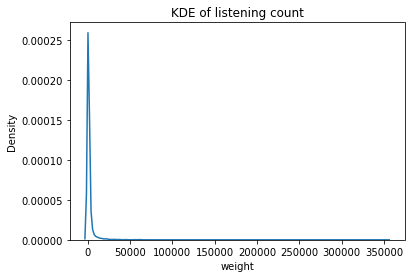

In [46]:
sns.kdeplot(data=flatten_df, x="weight")
plt.title("KDE of listening count")

Text(0.5, 1.0, 'KDE of listening count where listening counts are less than 5,000')

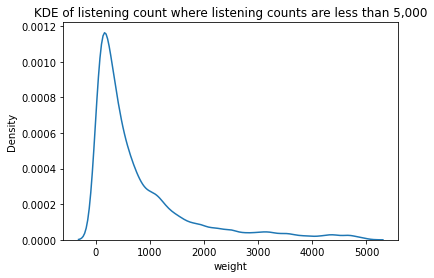

In [47]:
sns.kdeplot(data=flatten_df[flatten_df.weight < 5000], x="weight")
plt.title("KDE of listening count where listening counts are less than 5,000")

We are also interested in plotting the plotting the most and least number of tags. We observe pop and rock claim the top two spots. As tags are semantical categories by the users, we see a lot of non-sensical tags in the second plot such as "merge". We hypothesis that these  may be the title of a song.


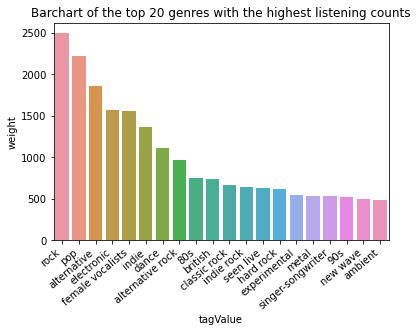

In [48]:
ax = sns.barplot(x="tagValue", y="weight", data=flatten_df[['tagValue','weight']].groupby('tagValue').count().reset_index().sort_values('weight', ascending=False).head(20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Barchart of the top 20 genres with the highest listening counts")
plt.show()

In [53]:
print(flatten_df[['tagValue','weight']].groupby('tagValue').count().reset_index().sort_values('weight').head(20))

                                       tagValue  weight
2758                                emma watson       0
5311                                  macy gray       0
5310                              macumba music       0
8153                                sonra dinle       0
3595                                 glitch-hop       0
8157                        sophie ellis-bextor       0
5309                             mactonight fav       0
5308                       mactonight essential       0
5307                               machine head       0
3599                       global communication       0
6940                                pra acalmar       0
3602                            glorious tracks       0
8167                                   soul-pop       0
5304                                       m0sh       0
8172                              sound collage       0
1301                                bomfunk mcs       0
8173  sound collage psychedelia electronic folk 

Finally, we conduct a basic visualisation of the friendship relationships. We are interested in the number of connections a user has.  We intend to explore this further in the graph analysis notebook.  We observe that most users have a relative low number of friends (less than 20). However, some have a high amount. We hypothesis that these are likely music critics, influencers or DJs.


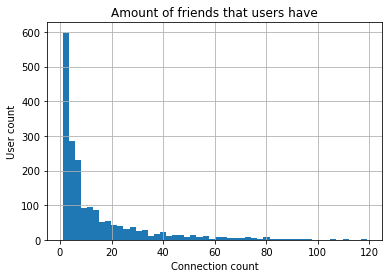

In [50]:
user_friends.groupby("userID")["friendID"].nunique().hist(bins=50)
plt.title("Amount of friends that users have")
plt.ylabel("User count")
plt.xlabel("Connection count")
plt.show()
plt.show()


## Data Cleaning 
Through the course of our visualisation development, we noticed a number of irregularities. According to the data, User 43 tagged Freemasons with the tag 'dance' in 1956. User 133 tagged  Claudia Leitte	with the tag 'axe' in 1957. This was before Lastfm was created, and before either artist started their careers! Thus, these values are removed from further analysis. In the graph analysis notebook, we are only interested in unique relationships i.e. the dataframe should **not** contain two values detailing the same relationship (user_25 -> user_51, user_51 ->user_25). Networkx's Graph object demands this requirement for undirected graphs. In addition, 5,499 artists **did not** have any listening counts attached so these were not included in our investigation. 

In [51]:
flatten_df = flatten_df[flatten_df.year >=2005]
unique_friendships = list()
for friend1, friend2 in zip(user_friends['userID'].values, user_friends['friendID'].values):
    if (friend1,friend2) not in unique_friendships and (friend2,friend1) not in unique_friendships:
        unique_friendships.append((friend1,friend2))
unique_friendships_df = pd.DataFrame(unique_friendships, columns =['friend1_id', 'friend2_id'])


## Save dataframes

In [36]:
unique_friendships_df.to_csv('data/unqiue_friendships.csv', index=False)
flatten_df.to_csv('data/flatten_data.csv', index=False)